## Building the /bi:/ CV from "bead" using EVL-core and targets from VocalTractLab

This is to convince me that:
 - We don't necessarily need to specify the TS\* and TR\* parameters
 - We can specify the C with few parameters and inherit the rest from V
 - The synthesis process in EVL-core is comparable to what happens in VocalTractLab GUI
 
**TODO:**
 - **Update second part of Notebook with latest VTL-GUI targets and outputs**


In [1]:
from copy import deepcopy

import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from IPython.display import display, HTML, Audio

from evoclearn.core import io
from evoclearn.core import samplers
from evoclearn.core import mappings
from evoclearn.core import vocaltractlab as vtl

In [2]:
#Load speaker bounds file and get neutral parameters from there:
bounds = io.load_bounds(open("../etc/JD2_bounds.json"))
params = list(bounds)
neutral_targets = [bounds[p]["default"] for p in params]

#Create target sequence with 2 targets: "C", "V" using the Uniform sampler (I should include some convenience functions for creating these at some point), the labels are not too important, but will determine the length of the sequence of targets:
seq = next(samplers.Uniform(bounds, labels=["C", "V"]))
#overwrite all target values with defaults
seq.loc[:, params] = neutral_targets

#Load preset targets from speaker file:
speaker = io.SpeakerFile("../etc/JD2_speaker.xml")
bii_vtlgui = speaker.vt_target("ll-labial-closure(i)")
ii_vtlgui = speaker.vt_target("i")

#Load durations for the two segments, and synthesise from targets:
cv_durs = [0.120, 0.480] #io.read_durations_from_textgrid("data/bead.TextGrid", tier="1")[:2]
vtl.initialise("../etc/JD2_speaker.xml")

<CDLL '/home/demitasse/workspace/evoclearn/evl_core/evoclearn/core/VocalTractLabApi.so', handle 46ec050 at 0x7f2088820fd0>

#### All neutral params

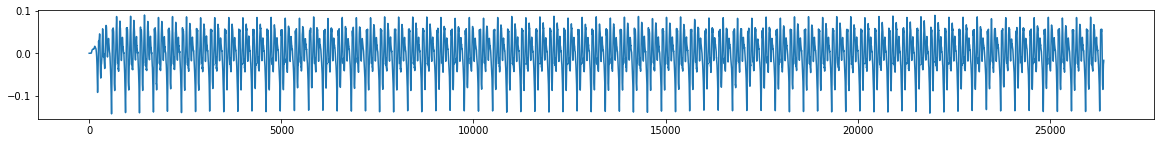

In [3]:
wav = mappings.synthesise_vtl_curves(mappings.vtl_curves_from_targets(seq, cv_durs))
io.wav_write(wav, "outputs/neutral.wav")
display(HTML(seq.to_html()))
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("outputs/neutral.wav"))

#### VTL-GUI targets (all vocaltract params)

- TODO: Everything below should be updated with the latest targets and outputs from the VTL-GUI

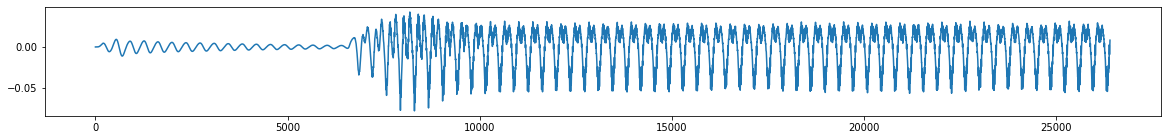

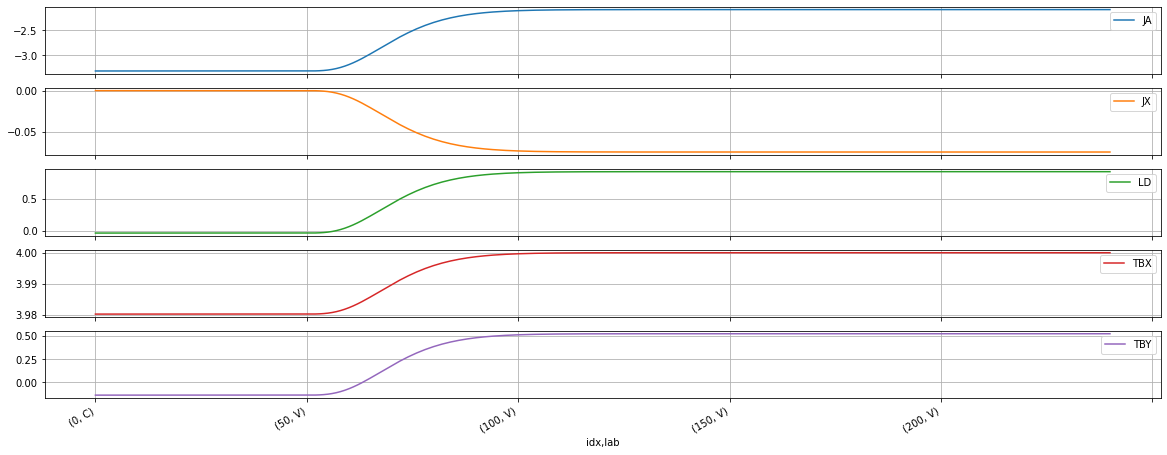

In [4]:
full_key = ["HX", "HY", "JX", "JA", "LP", "LD", "VS", "VO", "TCX", "TCY", "TTX", "TTY", "TBX", "TBY", "TRX", "TRY", "TS1", "TS2", "TS3"]

bii_vtlgui_full = deepcopy(seq)
bii_vtlgui_full["vt_tau_s"] = 0.012
bii_vtlgui_full.loc[(0, "C"), full_key] = list(bii_vtlgui[full_key].iloc[0])
bii_vtlgui_full.loc[(1, "V"), full_key] = list(ii_vtlgui[full_key].iloc[0])

motor_program = mappings.vtl_curves_from_targets(bii_vtlgui_full, cv_durs)

wav = mappings.synthesise_vtl_curves(motor_program)
io.wav_write(wav, "outputs/bii_vtlgui_full.wav")
display(HTML(bii_vtlgui_full.to_html()))
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("outputs/bii_vtlgui_full.wav"))
#display(HTML(motor_program.to_html()))
__ = motor_program[["JA", "JX", "LD", "TBX", "TBY"]].plot(subplots=True, figsize=(20,8), grid=True)

#### VTLGUI targets (reduced vocaltract params)

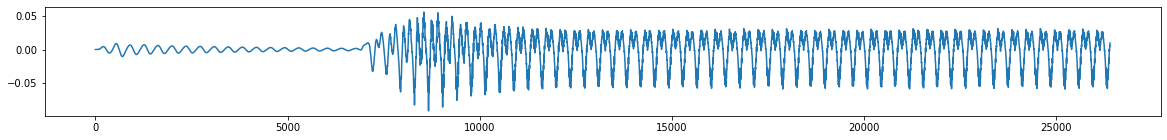

In [5]:
no_trts_key = ["HX", "HY", "JX", "JA", "LP", "LD", "VS", "VO", "TCX", "TCY", "TTX", "TTY", "TBX", "TBY"]

bii_vtlgui_notrts = deepcopy(seq)
bii_vtlgui_notrts.loc[(0, "C"), no_trts_key] = list(bii_vtlgui[no_trts_key].iloc[0])
bii_vtlgui_notrts.loc[(1, "V"), no_trts_key] = list(ii_vtlgui[no_trts_key].iloc[0])

wav = mappings.synthesise_vtl_curves(mappings.vtl_curves_from_targets(bii_vtlgui_notrts, cv_durs))
io.wav_write(wav, "outputs/bii_vtlgui_notrts.wav")
display(HTML(bii_vtlgui_notrts.to_html()))
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("outputs/bii_vtlgui_notrts.wav"))

#### VTL-GUI targets (CV coarticulation minimal specification for C)

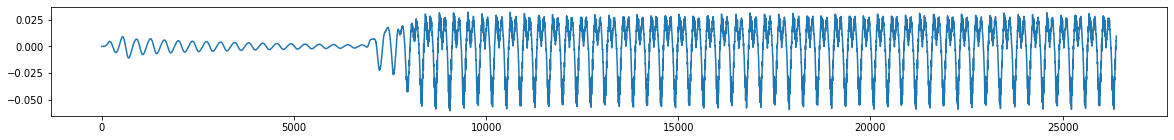

In [6]:
# FROM VTL-GUI: ll-labial-stop(i) and i
no_trts_key = ["HX", "HY", "JX", "JA", "LP", "LD", "VS", "VO", "TCX", "TCY", "TTX", "TTY", "TBX", "TBY"]
ii_vtlgui_vals = [1.00, -5.39, -0.25, -2.03, -0.09, 1.23, 0.40, -0.10, 2.50, -0.63, 4.66, -0.89, 3.73, 0.82]

c_key = ["JX", "JA", "LD"]
bii_vtlgui_vals = [-0.10, -3.28, -0.73]


bii_vtlgui_notrts_min_c = deepcopy(seq)
bii_vtlgui_notrts_min_c.loc[(0, "C"), no_trts_key] = list(ii_vtlgui[no_trts_key].iloc[0])
bii_vtlgui_notrts_min_c.loc[(0, "C"), c_key] = list(bii_vtlgui[c_key].iloc[0])
bii_vtlgui_notrts_min_c.loc[(1, "V"), no_trts_key] = list(ii_vtlgui[no_trts_key].iloc[0])

wav = mappings.synthesise_vtl_curves(mappings.vtl_curves_from_targets(bii_vtlgui_notrts_min_c, cv_durs))
io.wav_write(wav, "outputs/bii_vtlgui_notrts_min_c.wav")
display(HTML(bii_vtlgui_notrts_min_c.to_html()))
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("outputs/bii_vtlgui_notrts_min_c.wav"))

#### Synthesised with VTL-GUI

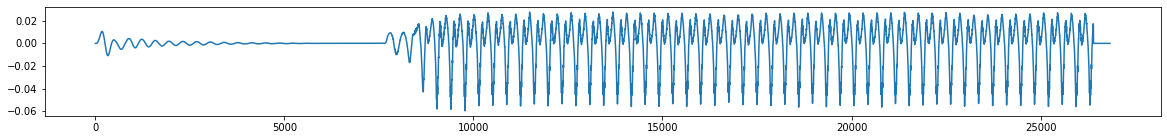

In [7]:
wav, sr = librosa.load("data/bii_vtlgui.wav", sr=44100)
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("data/bii_vtlgui.wav"))

#### Motor program curves from VTL-GUI

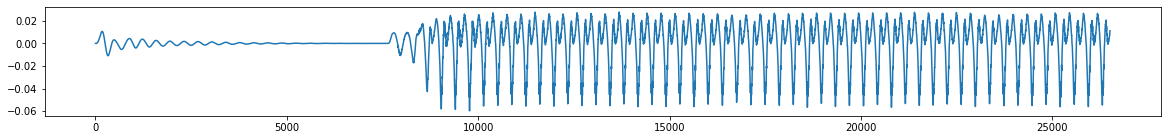

In [8]:
mpcurves = io.load_vtl_curves(open("data/bii_vtlgui.txt"))
wav = mappings.synthesise_vtl_curves(mpcurves)
io.wav_write(wav, "outputs/bii_vtlgui_curves.wav")
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("outputs/bii_vtlgui_curves.wav"))

#### Comparison of critical C parameter motor curves

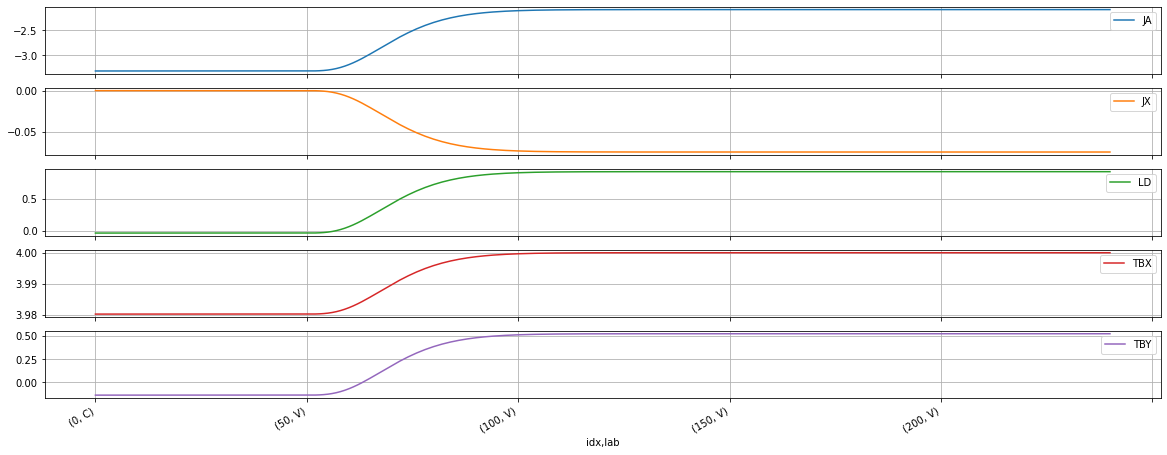

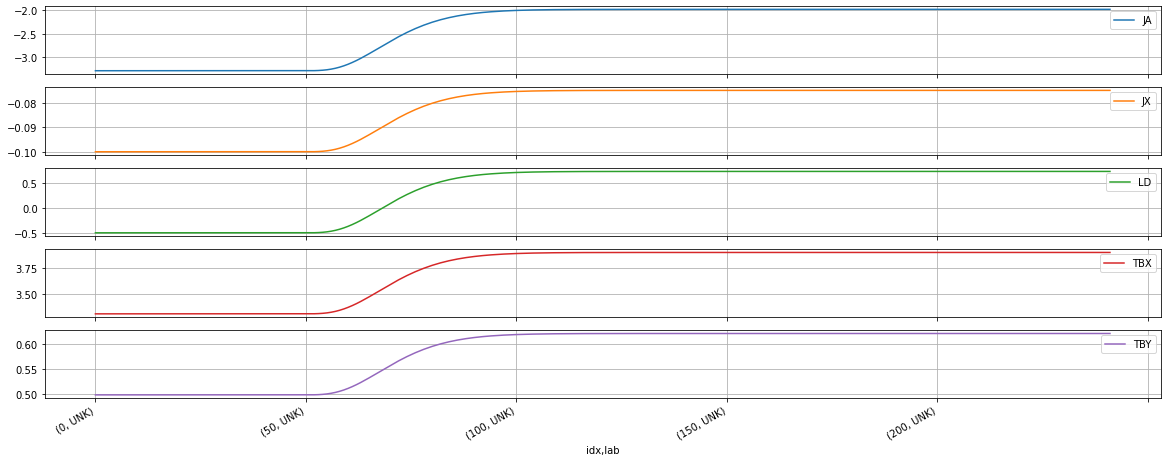

In [9]:
__ = motor_program[["JA", "JX", "LD", "TBX", "TBY"]].plot(subplots=True, figsize=(20,8), grid=True)
__ = mpcurves[["JA", "JX", "LD", "TBX", "TBY"]].plot(subplots=True, figsize=(20,8), grid=True)